In [3]:
!wget "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv"  -P ../datasets

--2024-12-22 12:20:25--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2,2K) [text/plain]
Saving to: ‘../datasets/moore.csv.1’

moore.csv.1         100%[===================>]   2,25K  --.-KB/s    in 0,001s  

2024-12-22 12:20:26 (3,66 MB/s) - ‘../datasets/moore.csv.1’ saved [2302/2302]



In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('../datasets/moore.csv', header=None).to_numpy()
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [8]:
X = data[:, 0].reshape(-1, 1)  # Making an N x D matrix
Y = data[:, 1]

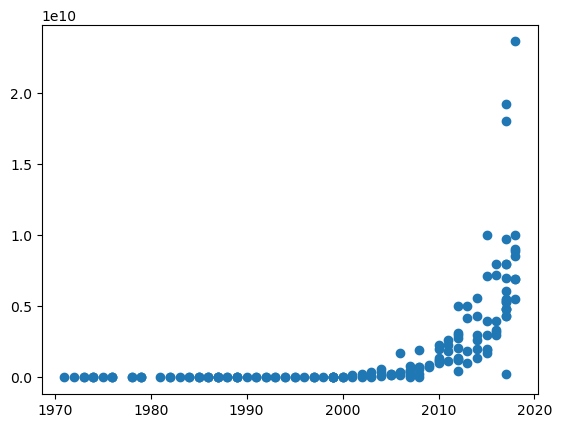

In [9]:
# plot the data
plt.scatter(X, Y)

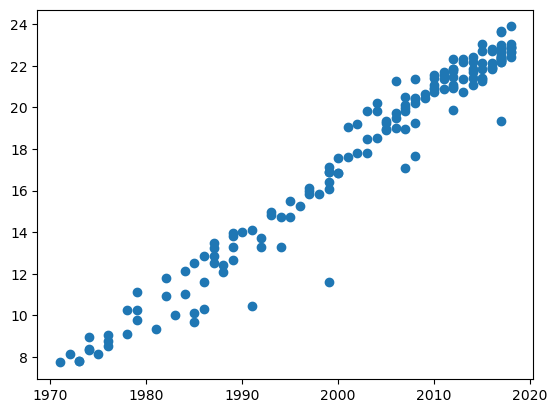

In [10]:
Y = np.log(Y)  # Linearizing data

plt.scatter(X, Y)

In [11]:
X = X - X.mean()

In [14]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(1),
    ]
)

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
)

In [16]:
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001


scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 741us/step - loss: 577.3365 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 358us/step - loss: 368.8368 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 359us/step - loss: 300.0791 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 356us/step - loss: 337.4786 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 384us/step - loss: 255.4919 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 350us/step - loss: 149.7832 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 351us/step - loss: 98.7218 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 364us/step - loss: 84.6936 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 407us/step - loss: 50.0558 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 406us/step - loss: 52.6883 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0

2024-12-22 13:31:52.009775: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - 0s 332us/step - loss: 1.1396 - lr: 0.0010
Epoch 28/200
6/6 [==============================] - 0s 359us/step - loss: 1.4780 - lr: 0.0010
Epoch 29/200
6/6 [==============================] - 0s 423us/step - loss: 1.3703 - lr: 0.0010
Epoch 30/200
6/6 [==============================] - 0s 394us/step - loss: 1.5528 - lr: 0.0010
Epoch 31/200
6/6 [==============================] - 0s 351us/step - loss: 1.5280 - lr: 0.0010
Epoch 32/200
6/6 [==============================] - 0s 410us/step - loss: 1.7821 - lr: 0.0010
Epoch 33/200
6/6 [==============================] - 0s 444us/step - loss: 1.7192 - lr: 0.0010
Epoch 34/200
6/6 [==============================] - 0s 355us/step - loss: 0.9694 - lr: 0.0010
Epoch 35/200
6/6 [==============================] - 0s 332us/step - loss: 1.2610 - lr: 0.0010
Epoch 36/200
6/6 [==============================] - 0s 402us/step - loss: 1.0085 - lr: 0.0010
Epoch 37/200
6/6 [==============================] - 0s 317us/step - loss:

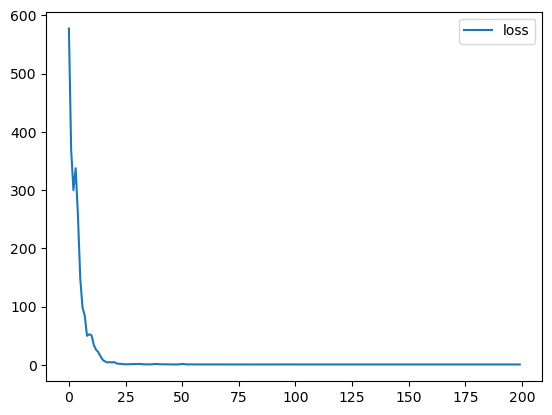

In [18]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [19]:
model.layers

In [20]:
model.layers[0].get_weights()

[array([[0.33608156]], dtype=float32), array([17.761438], dtype=float32)]

In [32]:
a = model.layers[0].get_weights()[0][0, 0]

In [33]:
a

0.33608156

## Part 2: Making predictions


6/6 [==============================] - 0s 328us/step


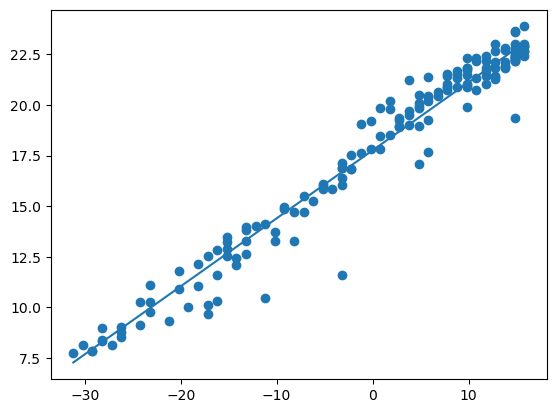

In [34]:
# Make sure that the line fits our data
Y_hat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Y_hat)

In [35]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we fattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Y_hat_manual = (X.dot(w) + b).flatten()

# Dont use == for floating points
np.allclose(Y_hat, Y_hat_manual)

True